### Modelo predictivo base de datos Banco 

En el análisis de la base de datos bancaria, se busca evaluar la probabilidad de incumplimiento de un crédito por parte de 
un individuo.
Mediante el estudio detallado de la información contenida en la base de datos, se pretende identificar patrones y variables
clave que puedan indicar si una persona tiene un riesgo significativo de entrar en default.

LINK A LA BASE DE DATOS KRAGGLE: https://www.kaggle.com/datasets/zaurbegiev/my-dataset/data

In [1]:
# Librerias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")

In [2]:
## tenemos dos base de datos la primera "df" son creditos pasados en el cual tenemos conocimientos si la persona defaulteo o no 
## la segunda base "df_nuevos" son datos completamentes nuevos en el cual no tenemos conomiento del status (nuestro objetivo sera predecirlos en base a datos de clientes pasados (df))

df=pd.read_csv("C:/Users/54351/Desktop/kaggle/base de datos/credit_train.csv")
df_nuevos=pd.read_csv("C:/Users/54351/Desktop/kaggle/base de datos/credit_test.csv")


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [3]:
pd.value_counts(df['Loan Status'])

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [4]:
df['Loan Status'] = df['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0})

In [5]:
# Eliminamos columnas innecesarias
cols_to_drop = ["Months since last delinquent","Loan ID", "Customer ID"]
df = df.drop(columns=cols_to_drop)
df_nuevos=df_nuevos.drop(columns=cols_to_drop)

In [8]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
## Separo para posteriormente hacer el dummy
categorical=[
    'Term', 'Years in current job','Home Ownership','Purpose'
]
numeric =[
    'Loan Status','Current Loan Amount','Credit Score',
    'Annual Income','Monthly Debt', 'Years of Credit History',
    'Number of Open Accounts',
    'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
] 

In [7]:
# Impugnamos valores nulos en las variables categóricas, reemplazándolos
    # por la moda
for col in categorical:
    df[col] = df[col].fillna(df[col].mode().values[0])
    # Impugnamos valores nulos en las variables numéricas, reemplazándolos
    # por la mediana
for col in numeric:
    df[col] = df[col].fillna(df[col].median())

    
    # Verificamos que no existan valores nulos en el dataset final
assert df.isna().any().any() == False

    # Verificamos que todas las columnas numéricas son variables numéricas
assert np.all(is_numeric_dtype(df[col]) for col in df.columns)

In [8]:
## Separo para posteriormente hacer el dummy en test 
categorical_1=[
    'Term', 'Years in current job','Home Ownership','Purpose'
]
numeric_1 =[
    'Current Loan Amount','Credit Score',
    'Annual Income','Monthly Debt', 'Years of Credit History',
    'Number of Open Accounts',
    'Number of Credit Problems', 'Current Credit Balance',
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
] 

In [9]:
# Impugnamos valores nulos en las variables categóricas, reemplazándolos
    # por la moda
for col in categorical_1:
    df_nuevos[col] = df_nuevos[col].fillna(df_nuevos[col].mode().values[0])
    # Impugnamos valores nulos en las variables numéricas, reemplazándolos
    # por la mediana
for col in numeric_1:
    df_nuevos[col] = df_nuevos[col].fillna(df_nuevos[col].median())

    
    # Verificamos que no existan valores nulos en el dataset final
assert df_nuevos.isna().any().any() == False

    # Verificamos que todas las columnas numéricas son variables numéricas
assert np.all(is_numeric_dtype(df_test[col]) for col in df_nuevos.columns)

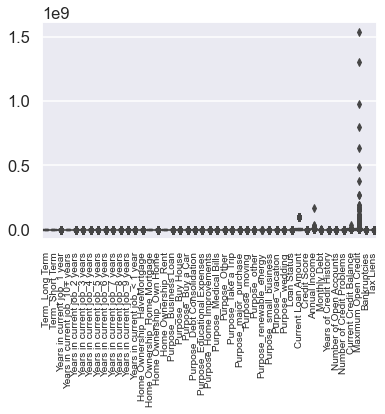

In [24]:
sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=10,horizontalalignment='center')
plt.show()

In [11]:
##dummy para train
encoded_categorias=pd.get_dummies(df[categorical])
df=pd.concat([encoded_categorias,df[numeric]], axis=1)

##dummy para test
encoded_categorias=pd.get_dummies(df_nuevos[categorical_1])
df_nuevos=pd.concat([encoded_categorias,df_nuevos[numeric_1]], axis=1)

In [12]:
df.head()
pd.value_counts(df['Loan Status'])

1.0    77875
0.0    22639
Name: Loan Status, dtype: int64

In [13]:
df_nuevos.head()

,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,1,0,1,0,0,0,0,0,0,...,747.0,2074116.0,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,0,1,0,1,0,0,0,0,0,0,...,734.0,1919190.0,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0
2,0,1,0,0,1,0,0,0,0,0,...,709.0,871112.0,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0
3,0,1,0,1,0,0,0,0,0,0,...,727.0,780083.0,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0
4,0,1,0,1,0,0,0,0,0,0,...,744.0,1761148.0,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [14]:
X=df.drop(["Loan Status"],axis = 1) #variables clasificadoras (features)
y=df["Loan Status"] # grupo (target)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [20]:
## usamos gridsearch para optimzar parametros
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# en este caso proponemos una búsqueda de la mejor estimación del modelo logístico armando una grilla dbe parámetros
# definimos en solver distintos métodos de estimación posibles de la logística que permite la función LogisticRegression  del paquete sklearn.linear
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# y en C se definen parámetros de regularización que aceleran el proceso de estimación (a medida que son más grandes) en este caso se proponen un vector de valores
# aleatorios espaciados según una escala logarítmica ( podrían haberse seleccionado en forma uniforme que son los nros aleatorios que se conocen comunmente).
C = np.logspace(-2, 10, 13)
# definimos el modelo a estimar LogisticRegression previo estandarizar los datos con StandardScaler
pipe_lr = Pipeline([('sc', StandardScaler()),
    ('LR', LogisticRegression())
    ])
# definimos los vectores de parámetros para hacer las estimaciones
params_lr = {
    'LR__C': C,
    'LR__solver': solver,
    "LR__penalty":["l1","l2","elasticnet"],
    "LR__class_weight" : ['balanced']
    }
# proponemos la busqueda del mejor modelo según el resultado de la mejor clasificación (accuracy) con la tasa crosvalidada (GridSearchCV)
search_lr = GridSearchCV(estimator=pipe_lr,
                      param_grid=params_lr,
                      cv = 5,
                      scoring="roc_auc",   
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

KeyboardInterrupt: 

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('sc', StandardScaler()),
    ('LR', LogisticRegression(C=1,class_weight="balanced",penalty="l2", solver ='liblinear'))])
pipe_lr.fit(X_train,y_train)
y_pred_lr = pipe_lr.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('--------------------')
print('Tabla de confusión')
print('-------------------')
CM = confusion_matrix(y_test,y_pred_lr)  # Matriz de confusión
print(CM)
print('--------------------')
print('Reporte de medidas de desempeño')
print('-------------------')
print(classification_report(y_test,y_pred_lr, digits = 2))
print('accuracy: ', accuracy_score(y_test,y_pred_lr))

--------------------
Tabla de confusión
-------------------
[[ 4042  2750]
 [ 6668 16695]]
--------------------
Reporte de medidas de desempeño
-------------------
              precision    recall  f1-score   support

         0.0       0.38      0.60      0.46      6792
         1.0       0.86      0.71      0.78     23363

    accuracy                           0.69     30155
   macro avg       0.62      0.65      0.62     30155
weighted avg       0.75      0.69      0.71     30155

accuracy:  0.687680318355165


In [ ]:
## descartamos la regresion losgistica por el bajo accuracy y roc , vamos a probar un arbol de desicion 

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, precision_score, recall_score  # métricas para evaluar
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install lightgbm
from lightgbm import LGBMClassifier


In [ ]:
## tarda demasasiadoooooo no volver a correr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# en este caso proponemos una búsqueda de la mejor estimación del modelo logístico armando una grilla dbe parámetros
# definimos en solver distintos métodos de estimación posibles de la logística que permite la función LogisticRegression  del paquete sklearn.linear
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# y en C se definen parámetros de regularización que aceleran el proceso de estimación (a medida que son más grandes) en este caso se proponen un vector de valores
# aleatorios espaciados según una escala logarítmica ( podrían haberse seleccionado en forma uniforme que son los nros aleatorios que se conocen comunmente).
C = np.logspace(-2, 10, 13)
# definimos el modelo a estimar LogisticRegression previo estandarizar los datos con StandardScaler
pipe_LGBM = Pipeline([('sc', StandardScaler()),
    ('LGBM', LGBMClassifier())
    ])
# definimos los vactores de parámetros para hacer las estimaciones
params_lr= {
    'LGBM__n_estimators': [5, 7, 10, 12, 15],
    'LGBM__max_depth': [5, 7, 10, 12, 15, 20],
    'LGBM__learning_rate': [0.01, 0.1, 0.25, 0.5, 0.75, 1],
    'LGBM__random_state': [11]
    }
# proponemos la busqueda del mejor modelo según el resultado de la mejor clasificación (accuracy) con la tasa crosvalidada (GridSearchCV)
search_lr = GridSearchCV(estimator=pipe_LGBM,
                      param_grid=params_lr,
                      cv = 5,
                      scoring="roc_auc",   
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

In [22]:
hiperparametros ={
    'LGBM__learning_rate': 0.25,
    'LGBM__max_depth': 12,
    'LGBM__n_estimators': 15,
    'LGBM__random_state': 11}
pipe_LGBM = Pipeline([('sc', StandardScaler()),
    ('LGBM', LGBMClassifier(**hiperparametros))])
pipe_LGBM.fit(X_train,y_train)
y_pred_lr = pipe_LGBM.predict(X_test)

[LightGBM] [Warning] Unknown parameter: LGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LGBM__random_state
[LightGBM] [Warning] Unknown parameter: LGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LGBM__random_state
[LightGBM] [Info] Number of positive: 54512, number of negative: 15847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1924
[LightGBM] [Info] Number of data points in the train set: 70359, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.774769 -> initscore=1.235441
[LightGBM] [Info] Start train

In [23]:
## vemos como la metrica mejora considerablemente usando arboles ensamblados 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('--------------------')
print('Tabla de confusión')
print('-------------------')
CM = confusion_matrix(y_test,y_pred_lr)  # Matriz de confusión
print(CM)
print('--------------------')
print('Reporte de medidas de desempeño')
print('-------------------')
print(classification_report(y_test,y_pred_lr, digits = 2))
print('accuracy: ', accuracy_score(y_test,y_pred_lr))

--------------------
Tabla de confusión
-------------------
[[ 1484  5308]
 [   71 23292]]
--------------------
Reporte de medidas de desempeño
-------------------
              precision    recall  f1-score   support

         0.0       0.95      0.22      0.36      6792
         1.0       0.81      1.00      0.90     23363

    accuracy                           0.82     30155
   macro avg       0.88      0.61      0.63     30155
weighted avg       0.85      0.82      0.77     30155

accuracy:  0.8216216216216217


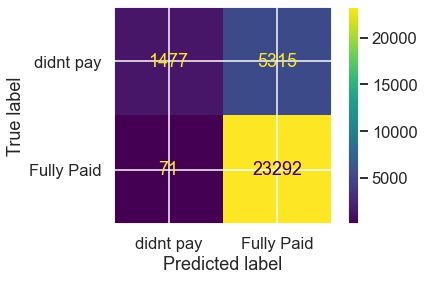

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr, display_labels=['didnt pay', 'Fully Paid'])
plt.show()

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
#ahora lo hacemos en test
from sklearn.metrics import accuracy_score

In [29]:
clf = svm.SVC()
clf.get_params()
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_train_pred_clf = clf.predict(X_train)
y_test_pred_clf = clf.predict(X_test)
print("CM: Linear SVC, Train Set")
print("_______")
print(confusion_matrix(y_train, y_train_pred_clf))
print("_______")
print("CM: Linear SVC, Test Set")
print("_______")
print(confusion_matrix(y_test, y_test_pred_clf))
print("_______")

In [31]:
## tarda demasiado ,mas de 5 hs 

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
# el halvinggridsearch se suele usar por el gridsearch  cuando quieor que sea mas rapido debido a que hace un primer recorrido con pocos recursos y los hiperparametro que dan muy mal los vas descartando y va aumentando en las siguientes pasadas con mas recursos pero con menos hiperparametros
# Defino los parámetros

#parameters = {'C': [0.1, 1, 10],
#              'kernel': ["linear","poly","rbf"],
#              'gamma': ["auto", "scale", 0.1, 1.0, 10],
#              'decision_function_shape': ['ovo', 'ovr']}
parameters = {'C': [10],
              'kernel': ["rbf"],
              'gamma': [ 0.1],
              'decision_function_shape': [ 'ovr']}
# Defino el modelo con CV
clf_cv = HalvingGridSearchCV(clf, parameters, random_state=0, scoring='accuracy')

clf_cv.fit(X_train, y_train)

clf_cv.best_params_, clf_cv.best_score_
# tenemos el entrenamiento del modelo en train

({'C': 10, 'decision_function_shape': 'ovr', 'gamma': 0.1, 'kernel': 'rbf'},
 0.7747693971719561)

In [1]:
3333

3333